In [13]:
import sqlalchemy
import pandas as pd
import numpy as np
import sql_functions as sf

from sql_functions import *
import psycopg2

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
schema = 'capstone_jmrs'
spotahome_final_3 = sf.get_dataframe(f'SELECT * FROM {schema}.spotahome_final_3')
spotahome_final_3

,platform_id,platform,neighborhood,property_type,housing_type,price_pcm,title,furnished,bathrooms,m2,bedrooms,available_from_total
0,642418,spotahome,Camden,apartments/bedrooms:2,Apartment,7200,"2 bedrooms apartment in Camden Town, London",furnished,2.0,82.0,2.0,2022-10-22
1,654298,spotahome,Hammersmith and Fulham,studios,Studio,2650,The Armadale Road Residence II,furnished,1.0,NaN,NaN,2022-10-10
2,654299,spotahome,Hammersmith and Fulham,studios,Studio,2500,The Armadale Road Residence III,furnished,1.0,NaN,NaN,2022-12-20
3,113567,spotahome,Hammersmith and Fulham,studios,Studio,1400,Studio flat with double bed to rent in Kensing...,furnished,1.0,NaN,NaN,2023-06-18
4,607194,spotahome,Kensington and Chelsea,studios,Studio,3033,"Studio for rent in Earls Court, London",furnished,NaN,NaN,NaN,2022-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...
831,398966,spotahome,Hackney,apartments/bedrooms:3more,Apartment,2100,4-bedroom apartment in Hackney,furnished,2.0,85.0,5.0,2024-01-06
832,602243,spotahome,Hackney,apartments/bedrooms:3more,Apartment,9000,4 bedrooms warehouse conversion for rent in Ha...,furnished,2.0,NaN,4.0,2023-08-04
833,844639,spotahome,Hackney,apartments/bedrooms:3more,Apartment,12000,4-bedroom apartment for rent in London,furnished,2.0,NaN,4.0,2023-08-04
834,370673,spotahome,Camden,apartments/bedrooms:2,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,1.0,NaN,2.0,2022-12-01


In [3]:
spotahome_final_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   platform_id           836 non-null    int64  
 1   platform              836 non-null    object 
 2   neighborhood          836 non-null    object 
 3   property_type         836 non-null    object 
 4   housing_type          836 non-null    object 
 5   price_pcm             836 non-null    int64  
 6   title                 836 non-null    object 
 7   furnished             836 non-null    object 
 8   bathrooms             524 non-null    float64
 9   m2                    266 non-null    float64
 10  bedrooms              592 non-null    float64
 11  available_from_total  836 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 78.5+ KB


In [4]:
spotahome_final_3.describe()

,platform_id,price_pcm,bathrooms,m2,bedrooms
count,836.000000,836.000000,524.000000,266.000000,592.000000
mean,544861.363636,4395.705742,1.322519,63.785714,1.773649
std,158406.159183,1947.398751,0.640408,67.331755,0.897137
min,98665.000000,1112.000000,1.000000,12.000000,1.000000
25%,422244.500000,3038.250000,1.000000,40.250000,1.000000
50%,568773.000000,4125.000000,1.000000,55.000000,2.000000
75%,642051.250000,5205.000000,2.000000,75.000000,2.000000
max,867016.000000,13892.000000,5.000000,1000.000000,6.000000


In [5]:
spotahome_final_3.corr()

,platform_id,price_pcm,bathrooms,m2,bedrooms
platform_id,1.000000,0.181987,0.146372,0.053998,0.177743
price_pcm,0.181987,1.000000,0.509969,0.171867,0.437569
bathrooms,0.146372,0.509969,1.000000,0.347529,0.626310
m2,0.053998,0.171867,0.347529,1.000000,0.374870
bedrooms,0.177743,0.437569,0.626310,0.374870,1.000000


In [6]:
spotahome_final_3.eval('price_per_sqm = price_pcm / m2', inplace=True)

In [7]:
spotahome_final_3

,platform_id,platform,neighborhood,property_type,housing_type,price_pcm,title,furnished,bathrooms,m2,bedrooms,available_from_total,price_per_sqm
0,642418,spotahome,Camden,apartments/bedrooms:2,Apartment,7200,"2 bedrooms apartment in Camden Town, London",furnished,2.0,82.0,2.0,2022-10-22,87.804878
1,654298,spotahome,Hammersmith and Fulham,studios,Studio,2650,The Armadale Road Residence II,furnished,1.0,NaN,NaN,2022-10-10,NaN
2,654299,spotahome,Hammersmith and Fulham,studios,Studio,2500,The Armadale Road Residence III,furnished,1.0,NaN,NaN,2022-12-20,NaN
3,113567,spotahome,Hammersmith and Fulham,studios,Studio,1400,Studio flat with double bed to rent in Kensing...,furnished,1.0,NaN,NaN,2023-06-18,NaN
4,607194,spotahome,Kensington and Chelsea,studios,Studio,3033,"Studio for rent in Earls Court, London",furnished,NaN,NaN,NaN,2022-10-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,398966,spotahome,Hackney,apartments/bedrooms:3more,Apartment,2100,4-bedroom apartment in Hackney,furnished,2.0,85.0,5.0,2024-01-06,24.705882
832,602243,spotahome,Hackney,apartments/bedrooms:3more,Apartment,9000,4 bedrooms warehouse conversion for rent in Ha...,furnished,2.0,NaN,4.0,2023-08-04,NaN
833,844639,spotahome,Hackney,apartments/bedrooms:3more,Apartment,12000,4-bedroom apartment for rent in London,furnished,2.0,NaN,4.0,2023-08-04,NaN
834,370673,spotahome,Camden,apartments/bedrooms:2,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,1.0,NaN,2.0,2022-12-01,NaN


In [8]:
spotahome_final_3['price_per_sqm'] = spotahome_final_3['price_per_sqm'].round(decimals = 2)

In [9]:
spotahome_final_3

,platform_id,platform,neighborhood,property_type,housing_type,price_pcm,title,furnished,bathrooms,m2,bedrooms,available_from_total,price_per_sqm
0,642418,spotahome,Camden,apartments/bedrooms:2,Apartment,7200,"2 bedrooms apartment in Camden Town, London",furnished,2.0,82.0,2.0,2022-10-22,87.80
1,654298,spotahome,Hammersmith and Fulham,studios,Studio,2650,The Armadale Road Residence II,furnished,1.0,NaN,NaN,2022-10-10,NaN
2,654299,spotahome,Hammersmith and Fulham,studios,Studio,2500,The Armadale Road Residence III,furnished,1.0,NaN,NaN,2022-12-20,NaN
3,113567,spotahome,Hammersmith and Fulham,studios,Studio,1400,Studio flat with double bed to rent in Kensing...,furnished,1.0,NaN,NaN,2023-06-18,NaN
4,607194,spotahome,Kensington and Chelsea,studios,Studio,3033,"Studio for rent in Earls Court, London",furnished,NaN,NaN,NaN,2022-10-05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,398966,spotahome,Hackney,apartments/bedrooms:3more,Apartment,2100,4-bedroom apartment in Hackney,furnished,2.0,85.0,5.0,2024-01-06,24.71
832,602243,spotahome,Hackney,apartments/bedrooms:3more,Apartment,9000,4 bedrooms warehouse conversion for rent in Ha...,furnished,2.0,NaN,4.0,2023-08-04,NaN
833,844639,spotahome,Hackney,apartments/bedrooms:3more,Apartment,12000,4-bedroom apartment for rent in London,furnished,2.0,NaN,4.0,2023-08-04,NaN
834,370673,spotahome,Camden,apartments/bedrooms:2,Apartment,6500,Serviced2-bedroom apartment for rent in King's...,furnished,1.0,NaN,2.0,2022-12-01,NaN


In [10]:
spotahome_clean = spotahome_final_3

In [22]:
spotahome_clean.describe()

,platform_id,price_pcm,bathrooms,m2,bedrooms,price_per_sqm
count,836.000000,836.000000,524.000000,266.000000,592.000000,266.000000
mean,544861.363636,4395.705742,1.322519,63.785714,1.773649,89.073233
std,158406.159183,1947.398751,0.640408,67.331755,0.897137,40.333935
min,98665.000000,1112.000000,1.000000,12.000000,1.000000,2.400000
25%,422244.500000,3038.250000,1.000000,40.250000,1.000000,57.697500
50%,568773.000000,4125.000000,1.000000,55.000000,2.000000,82.935000
75%,642051.250000,5205.000000,2.000000,75.000000,2.000000,116.572500
max,867016.000000,13892.000000,5.000000,1000.000000,6.000000,204.080000


In [23]:
spotahome_clean['neighborhood'].value_counts()

Kensington and Chelsea    257
City of Westminster       180
Camden                    138
Tower Hamlets              61
Hackney                    51
Islington                  45
Hammersmith and Fulham     44
Lambeth                    41
City of London             19
Name: neighborhood, dtype: int64

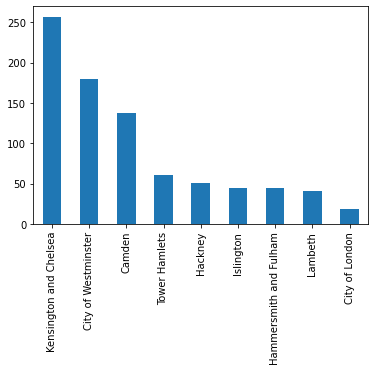

In [25]:
spotahome_clean['neighborhood'].value_counts().plot(kind='bar');

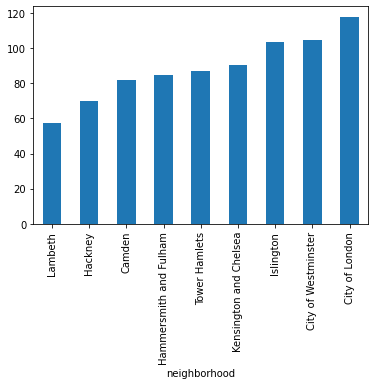

In [34]:
spotahome_clean.groupby('neighborhood')['price_per_sqm'].mean().sort_values().plot(kind='bar');

In [12]:
# # call the schema created for this project
# schema = 'capstone_jmrs'
# # get the function to connect to the database
# engine = get_engine()

# # give the table a unique name
# table_name = 'spotahome_clean'

# # import the table to sql
# if engine != None:
#     try:
#         spotahome_clean.to_sql(name=table_name,
#                                    con=engine,
#                                    if_exists='replace',
#                                    schema=schema,
#                                    index=False,
#                                    chunksize=5000,
#                                    method='multi')
#         print(f"The {table_name} table was imported successfully.")

#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         engine = None


The spotahome_clean table was imported successfully.
